<a href="https://colab.research.google.com/github/evan-placenis/Computer-Vision-Pt2/blob/main/Computer_Vision_Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-05-07 16:43:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   149MB/s    in 1.1s    

2023-05-07 16:43:56 (149 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directries and {len(filenames)} images in {dirpath}.")

There are 2 directries and 0 images in 10_food_classes_10_percent.
There are 10 directries and 0 images in 10_food_classes_10_percent/test.
There are 0 directries and 250 images in 10_food_classes_10_percent/test/hamburger.
There are 0 directries and 250 images in 10_food_classes_10_percent/test/grilled_salmon.
There are 0 directries and 250 images in 10_food_classes_10_percent/test/chicken_curry.
There are 0 directries and 250 images in 10_food_classes_10_percent/test/fried_rice.
There are 0 directries and 250 images in 10_food_classes_10_percent/test/chicken_wings.
There are 0 directries and 250 images in 10_food_classes_10_percent/test/ice_cream.
There are 0 directries and 250 images in 10_food_classes_10_percent/test/sushi.
There are 0 directries and 250 images in 10_food_classes_10_percent/test/pizza.
There are 0 directries and 250 images in 10_food_classes_10_percent/test/steak.
There are 0 directries and 250 images in 10_food_classes_10_percent/test/ramen.
There are 10 directrie

In [ ]:
##create data loaders (preparing the data)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/225.)
test_datagen = ImageDataGenerator(rescale=1/225.)

print("training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")
print("testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                                        target_size=IMAGE_SHAPE,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode="categorical")


training images:
Found 750 images belonging to 10 classes.
testing images:
Found 2500 images belonging to 10 classes.


In [ ]:
#setting up callbacks(things to run while our model trains)

#tensorboard callback (functionized to create a new one for each model)
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"saving tensorboard log files to: {log_dir}")
  return tensorboard_callback


In [ ]:
#tensorflow hub --> great resource for trained machine learning models

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"



In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
#create model function to create a model from URL

def create_model(model_url, num_classes = 10):
  #takes tenserflow hub url and creates a keras sequential model with, returns uncompiled sequential model_url as a feature extractor layer and dense output layer with num_classes output
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,#freeze the already learned patterns
                                           name="feature_extraction_layer",
                                           input_shape = IMAGE_SHAPE + (3,))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name = "output_layer")
  ])

  return model

In [ ]:
#create resnet model
resnet_model = create_model(resnet_url,
                            num_classes = train_data_10_percent.num_classes)
resnet_model.summary()

AttributeError: ignored

In [ ]:
#compile resnet model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])


In [ ]:
#fit the model to the data
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs = 5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data = test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="resnet50V2")])

saving tensorboard log files to: tensorflow_hub/resnet50V2/20230505-153033
Epoch 1/5
24/24 [==============================] - 33s 831ms/step - loss: 1.8718 - accuracy: 0.3987 - val_loss: 1.2218 - val_accuracy: 0.6068
Epoch 2/5
24/24 [==============================] - 45s 2s/step - loss: 0.8741 - accuracy: 0.7440 - val_loss: 0.8618 - val_accuracy: 0.7300
Epoch 3/5
24/24 [==============================] - 17s 733ms/step - loss: 0.6216 - accuracy: 0.8293 - val_loss: 0.7786 - val_accuracy: 0.7472
Epoch 4/5
24/24 [==============================] - 17s 734ms/step - loss: 0.4693 - accuracy: 0.8773 - val_loss: 0.7262 - val_accuracy: 0.7552
Epoch 5/5
24/24 [==============================] - 27s 1s/step - loss: 0.3757 - accuracy: 0.9107 - val_loss: 0.7109 - val_accuracy: 0.7636


In [ ]:
 #loss curves function
 import matplotlib.pyplot as plt
 def plot_loss_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    #plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    #plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Sccuracy")
    plt.xlabel("Epochs")
    plt.legend();

#plot_loss_curves(resnet_history)

In [ ]:
#now efficent net
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=train_data_10_percent.num_classes)

#compile EfficientNet model
efficientnet_model.compile(loss="categorical_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])

efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                              epochs = 5,
                                              steps_per_epoch = len(train_data_10_percent),
                                              validation_data = test_data,
                                              validation_steps = len(test_data),
                                              callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                       experiment_name="efficientnetb0")])

AttributeError: ignored

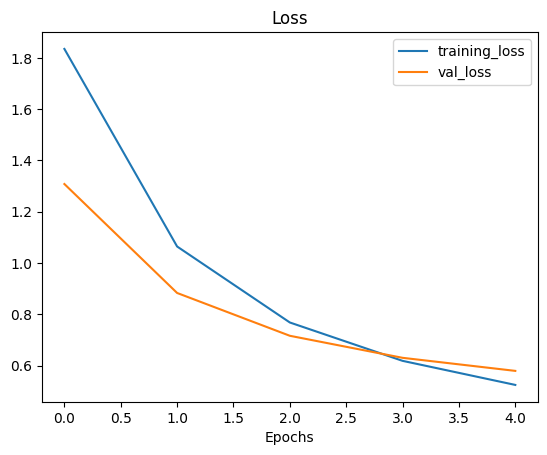

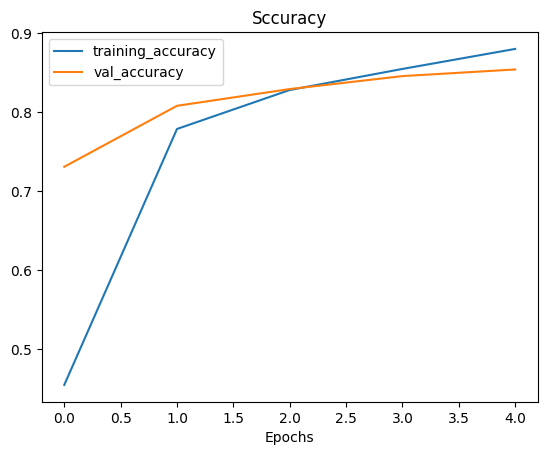

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
#upload Tensorboard Dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ --name "EfficientNetB0 vs. ResNet50v2" --description "Comparing two different TF Hub feature extraction model architectures" --one_shot

2023-05-07 16:44:27.674835: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   RFT-NLF-CWJ

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-pack

#Model 0

In [ ]:

#creating helper functions MIGHT HAVE TO REDOWNLOAD IF IT TIMES OUT
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-05-07 16:45:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-07 16:45:16 (64.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
#we still have 10 food classes 10 percent RUN THAT CELL

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMAGE_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size = 32)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#now using functional api instead of sequential! Gives us more flexibility with our models
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

#freeze the base model
base_model.trainable = False

#crete inputs into out model
inputs = tf.keras.layers.Input(shape=(224,224,3), name = "input_layer")

#normalize inputs
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)

#pass the inputs to base model
x = base_model(inputs)
print(f"shape after passing inputs through base model: {x.shape}")

#average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="gloabl_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#create the output activation layer
outputs = tf.keras.layers.Dense(10, activation = "softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs,outputs)

#compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])
#fit the model
history_10_percent = model_0.fit(train_data_10_percent,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data_10_percent),
                                  validation_data = test_data,
                                  validation_steps = int(0.25*len(test_data)),
                                  callbacks=[create_tensorboard_callback(dir_name = "transfer_learing",
                                                                         experiment_name= "10_percent_feature_extraction")])#this is the helper script

shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
saving tensorboard log files to: transfer_learing/10_percent_feature_extraction/20230507-172031
Epoch 1/5
24/24 [==============================] - 13s 256ms/step - loss: 1.8592 - accuracy: 0.4240 - val_loss: 1.2829 - val_accuracy: 0.7253


KeyboardInterrupt: ignored

In [ ]:
#evaluate of the full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 0.5481 - accuracy: 0.8648


[0.548086941242218, 0.864799976348877]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

base_model.summary()

0 input_4
1 rescaling_9
2 normalization_3
3 rescaling_10
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activat

In [ ]:
from tensorflow.python.ops.variables import global_variables_initializer
#demonstrationg GlobalAveragePooling
input_shape = (1,4,4,3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor}")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}")

Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]
2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2023-05-07 16:45:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 142.251.162.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   141MB/s    in 0.9s    

2023-05-07 16:45:56 (141 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size = IMAGE_SIZE,
                                                                           batch_size = 32)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           label_mode="categorical",
                                                                           image_size = IMAGE_SIZE,
                                                                           batch_size = 32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

(-0.5, 374.5, 524.5, -0.5)

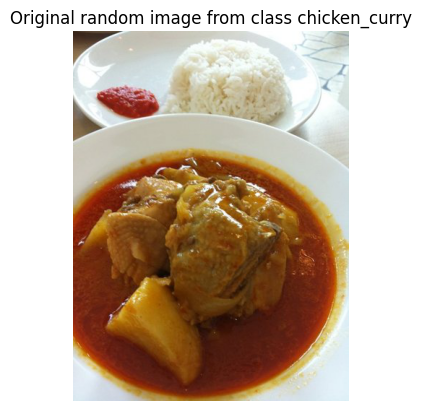

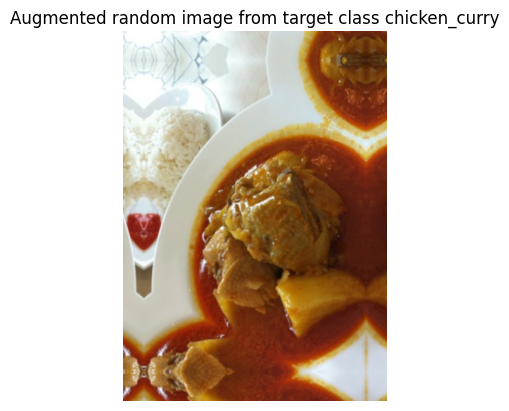

In [ ]:
#view how data augmentation works!
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

#read in random imgae
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)

#plot augmented random image
augmented_img = data_augmentation(img, training=True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from target class {target_class}")
plt.axis(False)



##model 1: feature extraction tl on 1% of data

In [ ]:

input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

#input layer
inputs = layers.Input(shape = input_shape, name = "input_layer")

x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x) #if its just a layer put on RHS (above are models so they go into it)
outputs = layers.Dense(10, activation = "softmax", name = "output_layer")(x)
model_1 = keras.Model(inputs,outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs = 5,
                                steps_per_epoch = len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25*len(test_data)),
                                callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                         experiment_name = "1_percent_data_aug")])

saving tensorboard log files to: transfer_learning/1_percent_data_aug/20230507-172936
Epoch 1/5
3/3 [==============================] - 13s 2s/step - loss: 2.4208 - accuracy: 0.1571 - val_loss: 2.1941 - val_accuracy: 0.2204
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1252 - accuracy: 0.3429 - val_loss: 2.0838 - val_accuracy: 0.2829
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9009 - accuracy: 0.4286 - val_loss: 1.9719 - val_accuracy: 0.3799
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.7303 - accuracy: 0.5714 - val_loss: 1.8669 - val_accuracy: 0.4309
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.5823 - accuracy: 0.6571 - val_loss: 1.7834 - val_accuracy: 0.4704


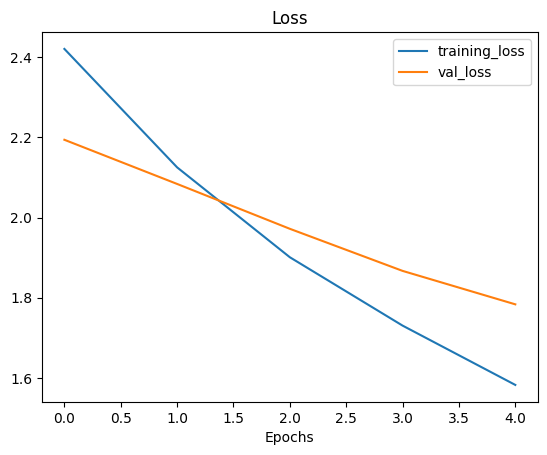

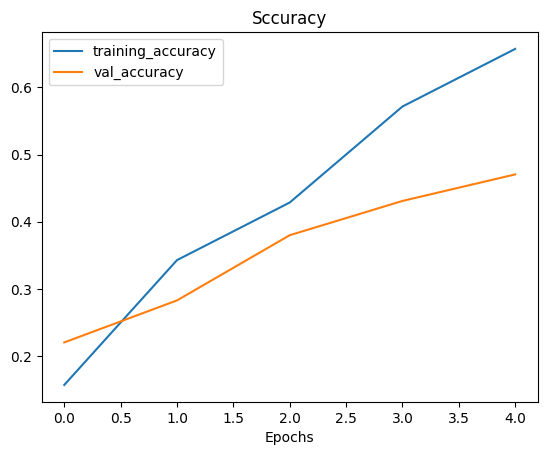

In [ ]:
plot_loss_curves(history_1_percent)

#Model 2 - same as model 1 but now 10 % of data

In [ ]:

train_dir_10_percent = "10_food_classes_10_percent/train"

IMG_SIZE = (224,224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode = "categorical",
                                                                            image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
data_augmentation.summary() #we have this but going to redo it

Model: "data_augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (512, 382, 3)             0         
                                                                 
 random_rotation_2 (RandomRo  (512, 382, 3)            0         
 tation)                                                         
                                                                 
 random_zoom_2 (RandomZoom)  (512, 382, 3)             0         
                                                                 
 random_height_2 (RandomHeig  (None, 382, 3)           0         
 ht)                                                             
                                                                 
 random_width_2 (RandomWidth  (None, None, 3)          0         
 )                                                               
                                                 

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

#build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0 bc it has it built in!
], name ="data_augmentation")

input_shape = (224,224,3)

#create frozen base model (also called backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

#create the inputs and outputs (including layers inbetween)
inputs = layers.Input(shape = input_shape, name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name = "global_average_pooling_2D")(x)
outputs = layers.Dense(10,activation = "softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
#creating a model_checkpoint callback
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

#saves weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                          save_weights_only = True,
                                                          save_best_only = False,
                                                          save_freq="epoch", #save every epoch
                                                          verbose = 1)

In [ ]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                         epochs = initial_epochs,
                                         validation_data = test_data,
                                         validation_steps = int(0.25*len(test_data)),
                                         callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                  experiment_name = "10_percent_data_aug"),
                                                      checkpoint_callback]
                                         )

saving tensorboard log files to: transfer_learning/10_percent_data_aug/20230507-181222
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9880 - accuracy: 0.3480
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 24s 666ms/step - loss: 1.9880 - accuracy: 0.3480 - val_loss: 1.4281 - val_accuracy: 0.6398
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3219 - accuracy: 0.6773
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 13s 505ms/step - loss: 1.3219 - accuracy: 0.6773 - val_loss: 1.0051 - val_accuracy: 0.7500
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9993 - accuracy: 0.7707
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 465ms/step - loss: 0.9993 - accuracy: 0.7707 - val_loss: 0.7955 - val_accuracy: 0.8076
E

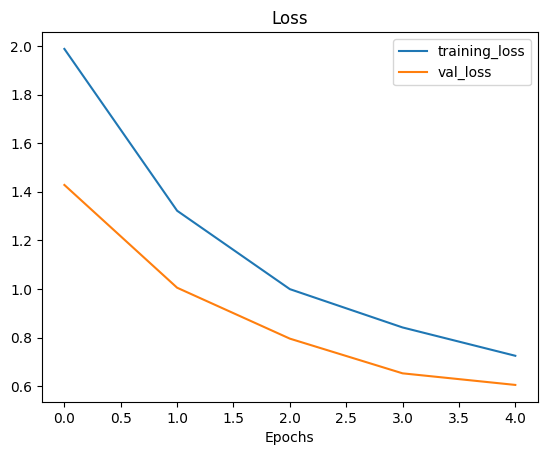

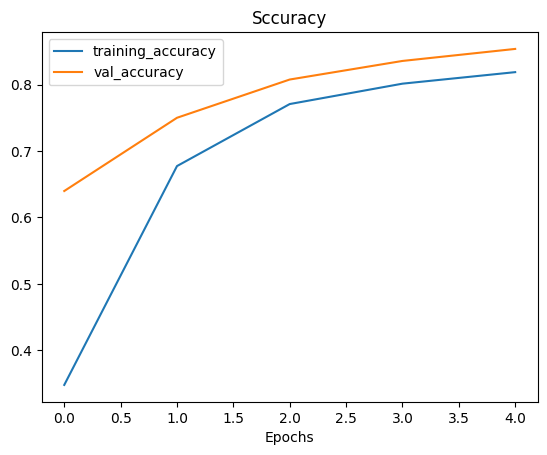

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
model_2.evaluate(test_data) #test on entire data set

79/79 [==============================] - 7s 78ms/step - loss: 0.6365 - accuracy: 0.8344


[0.6365344524383545, 0.8343999981880188]

In [ ]:
#how to use the weights we saved
model_2.load_weights(checkpoint_path) #override the weights with the ones saved

loaded_weights_results = model_2.evaluate(test_data)


79/79 [==============================] - 6s 70ms/step - loss: 0.6365 - accuracy: 0.8344


#MODEL 3 fine tuneing an existing model!!!

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7efd778e1e40> True
<keras.engine.sequential.Sequential object at 0x7efd864f2170> True
<keras.engine.functional.Functional object at 0x7efd76cccdf0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7efd778e1540> True
<keras.layers.core.dense.Dense object at 0x7efd76846ad0> True


In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_14 False
1 rescaling_28 False
2 normalization_13 False
3 rescaling_29 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [ ]:
#begining fine tuning (only setting last 10 layers of base model to be tunable)

base_model.trainable = True

#freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

#Have to recompile every time we make a change!!
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001), #dont update existing patterns too much in fine tuning, set learning rate low [10x lower]!!!
                metrics = ["accuracy"])
print(len(model_2.trainable_variables))

12


In [ ]:
#Fine Tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs = fine_tune_epochs,
                                               validation_data = test_data,
                                               validation_steps = int(0.25*len(test_data)),
                                               initial_epoch = history_10_percent_data_aug.epoch[-1],#start fine tuing from previous epoch
                                               callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                        experiment_name = "10_percent_fine_tune")])

saving tensorboard log files to: transfer_learning/10_percent_fine_tune/20230507-184418
Epoch 5/10
24/24 [==============================] - 26s 533ms/step - loss: 0.5999 - accuracy: 0.8480 - val_loss: 0.4835 - val_accuracy: 0.8569
Epoch 6/10
24/24 [==============================] - 12s 480ms/step - loss: 0.4732 - accuracy: 0.8613 - val_loss: 0.4248 - val_accuracy: 0.8651
Epoch 7/10
24/24 [==============================] - 10s 415ms/step - loss: 0.4436 - accuracy: 0.8707 - val_loss: 0.4206 - val_accuracy: 0.8536
Epoch 8/10
24/24 [==============================] - 9s 333ms/step - loss: 0.4047 - accuracy: 0.8773 - val_loss: 0.4001 - val_accuracy: 0.8734
Epoch 9/10
24/24 [==============================] - 10s 418ms/step - loss: 0.3555 - accuracy: 0.8987 - val_loss: 0.3988 - val_accuracy: 0.8635
Epoch 10/10
24/24 [==============================] - 9s 365ms/step - loss: 0.3025 - accuracy: 0.9147 - val_loss: 0.4117 - val_accuracy: 0.8618


In [ ]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 11s 71ms/step - loss: 0.4224 - accuracy: 0.8596


In [ ]:
#Update plot loss curves function that have been fit multiple times (before and after fine tuning)
def compare_history(original_history, new_history, initial_epochs = 5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  #combine original history

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  #accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label = "Training Accuracy")
  plt.plot(total_val_acc, label = "Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(), label = "Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Trainin and Validation Accuracy")

  #loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label = "Training Loss")
  plt.plot(total_val_loss, label = "Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(), label = "Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Trainin and Validation Accuracy")

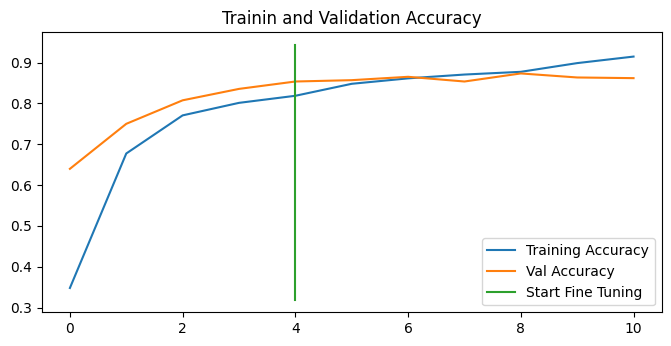

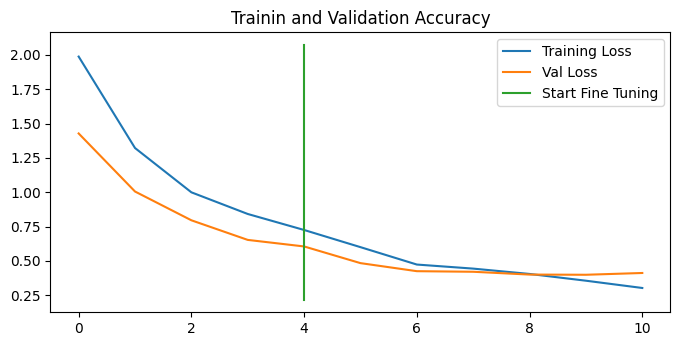

In [ ]:
compare_history(history_10_percent_data_aug,history_fine_10_percent_data_aug,initial_epochs = 5)

#Model 4: Fine Tune and feature extraction on all the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")

--2023-05-07 19:06:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  52.4MB/s    in 6.1s    

2023-05-07 19:07:01 (80.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                            label_mode = "categorical",
                                                                            image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.


In [ ]:
#need to revert model 2 back to its feature extraction weights, load its previous weights from checkpoint
model_2.load_weights(checkpoint_path)
model_2.evaluate(test_data)

79/79 [==============================] - 7s 75ms/step - loss: 0.6365 - accuracy: 0.8344


[0.6365342736244202, 0.8343999981880188]

In [ ]:
#check which laYers are tunable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, later.name, layer.trainable ) #EVEN THOUGH WE WENT BACK TO PREVIOUS CHECKPOINT, THE LAYERS ARE STILL TRAINABLE FROM WHEN WE CHANGED IT

0 input_layer False
1 data_augmentation False
2 efficientnetb0 False
3 global_average_pooling_2D False
4 output_layer False
0 output_layer False
1 output_layer False
2 output_layer False
3 output_layer False
4 output_layer False
5 output_layer False
6 output_layer False
7 output_layer False
8 output_layer False
9 output_layer False
10 output_layer False
11 output_layer False
12 output_layer False
13 output_layer False
14 output_layer False
15 output_layer False
16 output_layer False
17 output_layer False
18 output_layer False
19 output_layer False
20 output_layer False
21 output_layer False
22 output_layer False
23 output_layer False
24 output_layer False
25 output_layer False
26 output_layer False
27 output_layer False
28 output_layer False
29 output_layer False
30 output_layer False
31 output_layer False
32 output_layer False
33 output_layer False
34 output_layer False
35 output_layer False
36 output_layer False
37 output_layer False
38 output_layer False
39 output_layer False
40 out

In [ ]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                         epochs = fine_tune_epochs,
                                         validation_data = test_data,
                                         validation_steps = int(0.25*len(test_data)),
                                         initial_epoch = history_10_percent_data_aug.epoch[-1],
                                         callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                  experiment_name = "full_10_classes_fine_tune")])

saving tensorboard log files to: transfer_learning/full_10_classes_fine_tune/20230507-193619


Epoch 5/10
235/235 [==============================] - 41s 169ms/step - loss: 0.3206 - accuracy: 0.8948 - val_loss: 0.2714 - val_accuracy: 0.9046
Epoch 6/10
235/235 [==============================] - 43s 180ms/step - loss: 0.3003 - accuracy: 0.9039 - val_loss: 0.2600 - val_accuracy: 0.9161
Epoch 7/10
235/235 [==============================] - 41s 173ms/step - loss: 0.2879 - accuracy: 0.9075 - val_loss: 0.2529 - val_accuracy: 0.9062
Epoch 8/10
235/235 [==============================] - 38s 160ms/step - loss: 0.2593 - accuracy: 0.9216 - val_loss: 0.2554 - val_accuracy: 0.9211
Epoch 9/10
235/235 [==============================] - 37s 155ms/step - loss: 0.2494 - accuracy: 0.9220 - val_loss: 0.2299 - val_accuracy: 0.9112
Epoch 10/10
235/235 [==============================] - 36s 151ms/step - loss: 0.2268 - accuracy: 0.9297 - val_loss: 0.2344 - val_accuracy: 0.9112


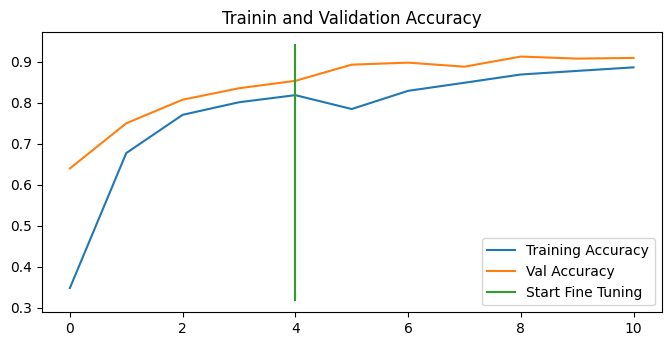

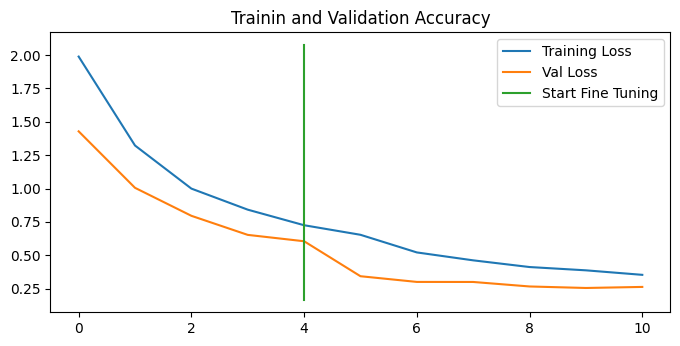

In [ ]:
compare_history(history_10_percent_data_aug, history_fine_10_classes_full, 5)

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
--name  "Transfer Learning Experiments with 10 Food101 Classes" \
--description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
--one_shot #exits the uploader once its finished uploading

2023-05-07 19:40:23.221616: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/of7HqKM9Rr213jb9KLwS9w/

[2023-05-07T19:40:25] Started scanning logdir.
[2023-05-07T19:40:32] Total uploaded: 228 scalars, 0 tensors, 7 binary objects (6.2 MB)
[2023-05-07T19:40:32] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/of7HqKM9Rr213jb9KLwS9w/


#Scaling Up Pt3


In [ ]:
#helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-25 18:37:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-25 18:37:27 (92.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")



--2023-05-25 18:37:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.69.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  38.3MB/s    in 40s     

2023-05-25 18:38:12 (38.4 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode = "categorical",
                                                                                image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode = "categorical",
                                                               image_size = IMG_SIZE,
                                                               shuffle = False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
#create a checkpoint callback
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only = True,
                                                         monitor="val_accuracy",
                                                         save_best_only = True)


In [ ]:
#create data augmentation layer
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  #preprocessing.Rescaling(1/255.)
], name="data_augmentation")

In [ ]:
#headless (no top layers) efficientNEtB0 backbone model
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False #freeze all the patterns it has already learned

#make top layers trainable
inputs = layers.Input(shape=(224,224,3), name = "input_layer")
x = data_augmentation(inputs) #only happens during training
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = "gloabl_avg_pool_layer")(x)
outputs = layers.Dense(101, activation = "softmax", name = "output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                         epochs = 5,
                                         validation_data = test_data,
                                         validation_steps = int(0.15*len(test_data)),
                                         callbacks = [checkpoint_callback])


Epoch 1/5
237/237 [==============================] - 117s 445ms/step - loss: 3.3893 - accuracy: 0.2660 - val_loss: 2.4401 - val_accuracy: 0.4876
Epoch 2/5
237/237 [==============================] - 90s 378ms/step - loss: 2.1981 - accuracy: 0.4974 - val_loss: 1.9795 - val_accuracy: 0.5352
Epoch 3/5
237/237 [==============================] - 72s 303ms/step - loss: 1.8164 - accuracy: 0.5727 - val_loss: 1.8387 - val_accuracy: 0.5442
Epoch 4/5
237/237 [==============================] - 65s 271ms/step - loss: 1.6156 - accuracy: 0.6099 - val_loss: 1.7210 - val_accuracy: 0.5593
Epoch 5/5
237/237 [==============================] - 62s 258ms/step - loss: 1.4497 - accuracy: 0.6446 - val_loss: 1.7187 - val_accuracy: 0.5612


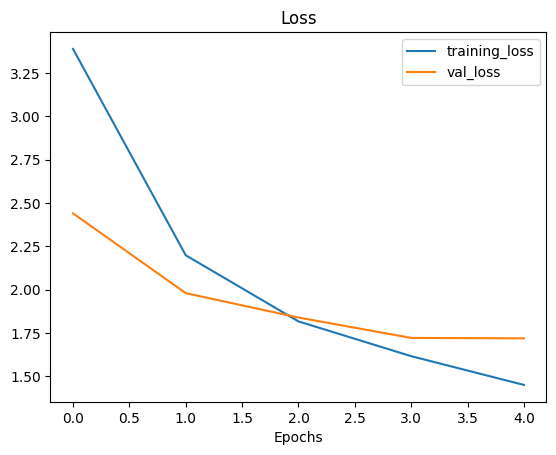

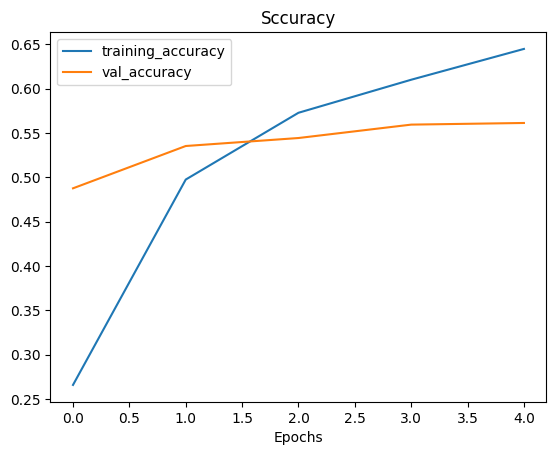

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

In [ ]:
#unfreeze all layers in the base model
base_model.trainable = True

#refreeze every layer except the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ["accuracy"])

In [ ]:
#check which layers are traibable in base model
for layerNum, layer in enumerate(model.layers[2].layers):
  print(layerNum, layer.trainable)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [ ]:
#Fine-tune for 5 more epochs
fine_tune_epochs = 10

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                           epochs = fine_tune_epochs,
                                           validation_data = test_data,
                                           validation_steps = int(0.15* len(test_data)),
                                           initial_epoch = history_all_classes_10_percent.epoch[-1])

Epoch 5/10
237/237 [==============================] - 68s 244ms/step - loss: 1.1958 - accuracy: 0.6921 - val_loss: 1.7141 - val_accuracy: 0.5453
Epoch 6/10
237/237 [==============================] - 56s 232ms/step - loss: 1.0875 - accuracy: 0.7067 - val_loss: 1.6934 - val_accuracy: 0.5567
Epoch 7/10
237/237 [==============================] - 52s 217ms/step - loss: 1.0061 - accuracy: 0.7304 - val_loss: 1.6627 - val_accuracy: 0.5606
Epoch 8/10
237/237 [==============================] - 65s 269ms/step - loss: 0.9285 - accuracy: 0.7498 - val_loss: 1.7113 - val_accuracy: 0.5506
Epoch 9/10
237/237 [==============================] - 50s 207ms/step - loss: 0.8878 - accuracy: 0.7636 - val_loss: 1.7033 - val_accuracy: 0.5567
Epoch 10/10
237/237 [==============================] - 54s 223ms/step - loss: 0.8251 - accuracy: 0.7783 - val_loss: 1.7568 - val_accuracy: 0.5466


In [ ]:
all_classes_10_percent_fine_tune_results = model.evaluate(test_data)

790/790 [==============================] - 75s 95ms/step - loss: 1.4977 - accuracy: 0.6050


In [ ]:
#compare histories of feature extration model vs fine tune
compare_historys(original_history = history_all_classes_10_percent,
                 new_history = history_all_classes_10_percent_fine_tune,
                 initial_epochs = 5)

NameError: ignored

In [ ]:
#save and load our model

model.save("drive/MyDrive/TensorFlow")
loaded_model = tf.keras.models.load_model("drive/MyDrive/TensorFlow")

Making predictions with the trained model

In [ ]:


y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10] #look at the first 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import accuracy_score

preds_probs = model.predict(test_data, verbose = 1) #set verbose to see how long is
pred_classes = preds_probs.argmax(axis = 1)

sklearn_accuracy = accuracy_score(y_true = y_labels,
                                  y_pred = pred_classes)

790/790 [==============================] - 85s 105ms/step


In [ ]:
sklearn_accuracy

Confusion Matrix

In [ ]:
from helper_functions import make_confusion_matrix
class_names = test_data.class_names

In [ ]:
make_confusion_matrix(y_true = y_labels,
                      y_pred = pred_classes,
                      classes = class_names,
                      figsize = (100,100),
                      text_size = 20)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_labels,
                            y_pred = pred_classes))

              precision    recall  f1-score   support

           0       0.33      0.22      0.26       250
           1       0.52      0.75      0.61       250
           2       0.73      0.55      0.63       250
           3       0.91      0.37      0.52       250
           4       0.61      0.34      0.43       250
           5       0.38      0.54      0.45       250
           6       0.72      0.82      0.77       250
           7       0.86      0.74      0.80       250
           8       0.26      0.54      0.35       250
           9       0.40      0.66      0.50       250
          10       0.61      0.36      0.46       250
          11       0.84      0.57      0.68       250
          12       0.67      0.63      0.65       250
          13       0.51      0.58      0.54       250
          14       0.57      0.55      0.56       250
          15       0.49      0.32      0.39       250
          16       0.67      0.58      0.62       250
          17       0.40    

In [ ]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict = True)
classification_report_dict

{'0': {'precision': 0.3313253012048193,
  'recall': 0.22,
  'f1-score': 0.2644230769230769,
  'support': 250},
 '1': {'precision': 0.5151515151515151,
  'recall': 0.748,
  'f1-score': 0.6101141924959217,
  'support': 250},
 '2': {'precision': 0.7301587301587301,
  'recall': 0.552,
  'f1-score': 0.6287015945330295,
  'support': 250},
 '3': {'precision': 0.9108910891089109,
  'recall': 0.368,
  'f1-score': 0.5242165242165242,
  'support': 250},
 '4': {'precision': 0.6131386861313869,
  'recall': 0.336,
  'f1-score': 0.434108527131783,
  'support': 250},
 '5': {'precision': 0.3767313019390582,
  'recall': 0.544,
  'f1-score': 0.44517184942716864,
  'support': 250},
 '6': {'precision': 0.723404255319149,
  'recall': 0.816,
  'f1-score': 0.7669172932330827,
  'support': 250},
 '7': {'precision': 0.8604651162790697,
  'recall': 0.74,
  'f1-score': 0.7956989247311828,
  'support': 250},
 '8': {'precision': 0.25806451612903225,
  'recall': 0.544,
  'f1-score': 0.3500643500643501,
  'support': 

In [ ]:
class_f1_scores = {}

for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    #add class names and F1 score to new dictionaory
    class_f1_scores[class_names[int(k)]] = v["f1-score"]

NameError: ignored

In [ ]:
import pandas as pd
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                          "f1_score": list(class_f1_scores.values())}).sort_values("f1_score", ascending = False)
f1_scores[:-10]

,class_names,f1_score
33,edamame,0.953307
63,macarons,0.888412
75,pho,0.849057
86,sashimi,0.843882
51,guacamole,0.842308
...,...,...
17,cheesecake,0.417625
87,scallops,0.402626
59,lasagna,0.394118
50,grilled_salmon,0.390110


Visualizing predictions on test and custom images

In [ ]:
#Create a function to load and prepare images
def load_and_pred_image(filename, img_shape=224, scale = True):
  #read file image
  img = tf.io.read_file(filename)
  #decode img into tensor
  img = tf.io.decode_image(img, channels = 3)
  #Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  if scale:
    #rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 30ms/step


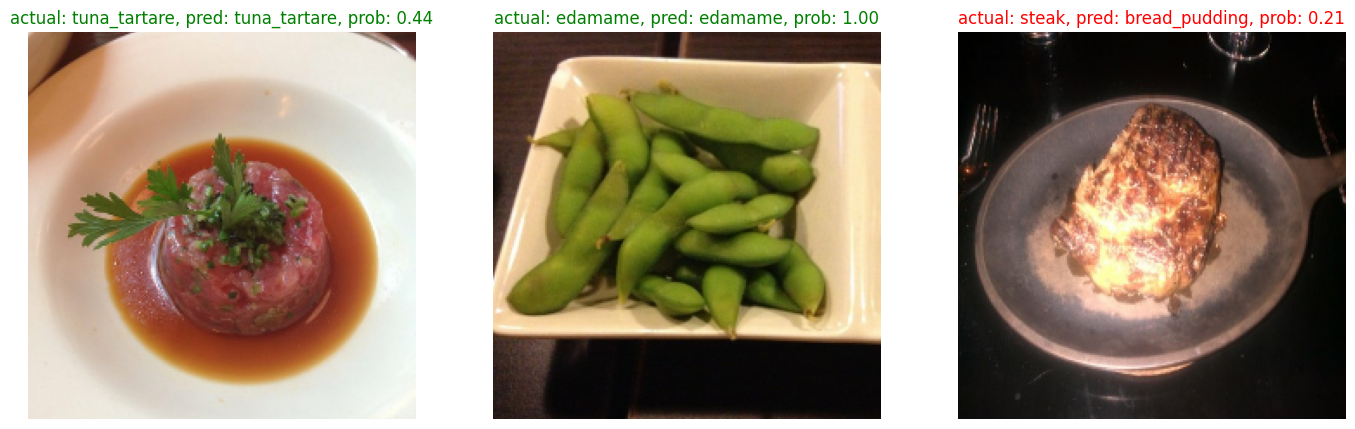

In [ ]:
import os
import random

plt.figure(figsize = (17,10))
for i in range(3):
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  #Load the image and make predictions
  img = load_and_pred_image(filepath, scale = False)
  pred_prob = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[pred_prob.argmax()] #get highest prediction index

  plt.subplot(1,3,i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = "g"
  else:
    title_color = "r"

  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c = title_color)
  plt.axis(False)